# Modelo de Regresión Multiple

Un modelo de regresión con múltiples covariables o predictores se puede escribir de la siguiente manera:

$$y_i = \beta_0 + \beta_1 x_{1,i} + ... + \beta_{k-1} x_{k-1, i} + \varepsilon_i$$

Observe que queremos estimar $k$ parámetros (incluyendo a $\beta_0$), usando $k-1$ covariables a partir de una base de datos con $n$ observaciones 

$$\{y_i, x_{1,i}, x_{2,i}, ..., x_{k-1,i}\}_{i=1}^n$$

Pero antes de derivar los estimadores de los parámetros $\beta_j$, veamos una aplicación:

## Aplicación: Retornos a la Educación, Experiencia, y Gaps

Consideremos ahora la siguiente extensión del modelo minceriano:

$$\log(w_i) = \beta_0 + \beta_1 s_i + \beta_2 x_i + \beta_3 x_i^2 + \beta_4 f_i + \varepsilon_i$$

donde:

- $w_i$ representa el ingreso laboral del individuo $i$, 
- $s_i$ sus años de educación, $x_i$ la experiencia laboral, y 
- $f_i$ es una variable binaria que toma el valor de 1 si $i$ es mujer y $0$ si no.

In [21]:
install.packages("wooldridge"); library(wooldridge)
data('wage1'); names(wage1) #Cargar datos
wage1$ln_wage <- log(wage1$wage) #Limpiar Datos
wage1 <- wage1[wage1$ln_wage > 0, ]
wage1 <- wage1[wage1$educ > 5, ]

Warning message:
"package 'wooldridge' is in use and will not be installed"


[1] "wage"     "educ"     "exper"    "tenure"   "nonwhite" "female"  
 [7] "married"  "numdep"   "smsa"     "northcen" "south"    "west"    
[13] "construc" "ndurman"  "trcommpu" "trade"    "services" "profserv"
[19] "profocc"  "clerocc"  "servocc"  "lwage"    "expersq"  "tenursq"

In [23]:
full_model <- lm(log(wage) ~ educ + exper + expersq + female, data = wage1) #Correr modelo
summary(full_model) #Presentar resultados


Call:
lm(formula = log(wage) ~ educ + exper + expersq + female, data = wage1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1629 -0.2765 -0.0211  0.2546  1.1970 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.3096151  0.1087687   2.847   0.0046 ** 
educ         0.0910553  0.0074975  12.145  < 2e-16 ***
exper        0.0377801  0.0048163   7.844 2.56e-14 ***
expersq     -0.0006676  0.0001079  -6.186 1.26e-09 ***
female      -0.3310652  0.0360205  -9.191  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4059 on 512 degrees of freedom
Multiple R-squared:  0.4034,	Adjusted R-squared:  0.3987 
F-statistic: 86.54 on 4 and 512 DF,  p-value: < 2.2e-16


## Covariables No-lineales

Observe que para interpretar el **efecto de la experiencia** en el salario, debemos suponer que las otras variables permanenen constantes:

$$\frac{\partial \log(w_i)}{\partial x_i} = \beta_2 + 2 \cdot \beta_3 x_i$$

Así, *ceteris paribus* (todo lo demás constante), un incremento en un año de experiencia, aumenta el salario en $(\beta_2 + 2 \cdot x_i \cdot \beta_3)100\%$. Note que para una persona que pasa de 1 a 2 años, el salario aumenta en $(3.8\% - 2\cdot2\cdot(0.06\%)) \approx 3.51\%$. Para una pesona que pasa de 2 a 3 años, el salario aumenta en $(3.8\% - 2\cdot3\cdot(0.06\%)) \approx 3.37\%$.

A continuación estimamos el modelo (restringido) $\log(w_i) = \beta_0 + \beta_2 x_i + \beta_3 x_i^2$, que nos permite observar la **no linealidad** del efecto de la experiencia en el salario.

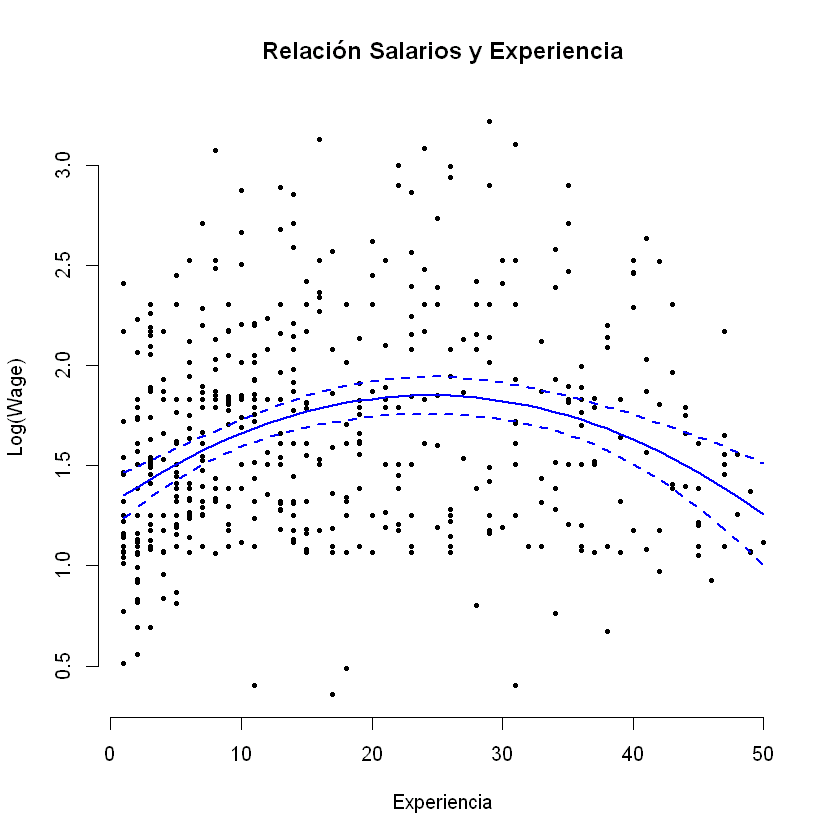

In [24]:
model <- lm(log(wage) ~ exper + expersq, data = wage1)
model_fit <- as.data.frame(predict(model, se.fit = TRUE, , interval = "confidence",  data = datos, level = 0.99))
names(model_fit) <- c('yhat', 'lwr', 'upr', 'se', 'df', 'residuals')

plot(wage1$exper, log(wage1$wage), pch = 19, cex = 0.6, frame = FALSE, main = "Relación Salarios y Experiencia", xlab = 'Experiencia', ylab = 'Log(Wage)')
lines(sort(wage1$exper), model_fit$yhat[order(wage1$exper)], col = "blue", lwd=2, lty = 1)
lines(sort(wage1$exper), model_fit$lwr[order(wage1$exper)], col = "blue", lwd=2, lty = 2)
lines(sort(wage1$exper), model_fit$upr[order(wage1$exper)], col = "blue", lwd=2, lty = 2)

## Covariables Binarias

Cómo interpretamos el efecto de ser mujer en los salarios? Note que no podemos tomar derivadas porque $f_i$ no es una variable continua.

Sin embargo observe que:

$$E\left(\log(w_i) | f_i = 0 \right) = \beta_0 + \beta_1 s_i + \beta_2 x_i + \beta_3 x_i^2$$

$$E\left(\log(w_i) | f_i = 1 \right) = \beta_0 + \beta_1 s_i + \beta_2 x_i + \beta_3 x_i^2 + \beta_4$$

Es facil ver que:

$$E\left(\log(w_i) | f_i = 1 \right) - E\left(\log(w_i) | f_i = 0 \right) = \beta_4$$

Es decir, $\beta_4$ es el cambio promedio en el salario por ser mujer. 

A partir de nuestras estimaciones, ser mujer reduce el salario en 33\%, *ceteris paribus*.

A continuación mostramos que nuestro modelo nos permite ajustar una línea (plano) para hombres y mujeres. Para ello usarémos el modelo (restringido) $\log(w_i) = \beta_0 + \beta_1 s_i + \beta_4 f_i$.

In [1]:
model <- lm(log(wage) ~ educ + female, data = wage1)
males <- model$coefficients[1] + model$coefficients[2]*wage1$educ
females <- (model$coefficients[1] + model$coefficients[3]) + model$coefficients[2]*wage1$educ

colors <- c("#FDAE61", "#66BD63"); markers <- c(2, 19)
plot(wage1$educ, log(wage1$wage), pch = markers[factor(wage1$female)], cex = 0.8, frame = FALSE, col = colors[factor(wage1$female)], main = "Relación Salarios y Educación", xlab = 'Años de Educación', ylab = 'Log(Wage)')
lines(sort(wage1$educ), males[order(wage1$educ)], col = "#FDAE61", lwd=2, lty = 1)
lines(sort(wage1$educ), females[order(wage1$educ)], col = "#66BD63", lwd=2, lty = 1)

ERROR: Error in eval(mf, parent.frame()): objeto 'wage1' no encontrado


## Modelo de Regresión en Forma Matricial

En forma matricial, nuestro modelo de regresión se ve de la siguiente forma:

$$Y = X\beta + \varepsilon$$

Observe que tenemos cuatro matrices:

$$
Y_{[n \times 1]} = X_{[n \times k]} \, \beta_{[k \times 1]} + \varepsilon_{[n \times 1]}
$$ 

$$
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}
=
\begin{bmatrix}
1 & x_{11} & x_{21} & \dots & x_{k-1,1} \\
1 & x_{12} & x_{22} & \dots & x_{k-1,2} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{1n} & x_{2n} & \dots & x_{k-1,n}
\end{bmatrix}
\begin{bmatrix}
\beta_0 \\
\beta_1 \\
\vdots \\
\beta_{k-1}
\end{bmatrix}
+
\begin{bmatrix}
\varepsilon_1 \\
\varepsilon_2 \\
\vdots \\
\varepsilon_n
\end{bmatrix}
$$

La forma matricial es una manera útil de presentar $n$ **ecuaciones**, ya que:

$$
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}
=
\begin{bmatrix}
\beta_0 + \sum_j^{k-1} \beta_j x_{j1} + \varepsilon_1 \\
\beta_0 + \sum_j^{k-1} \beta_j x_{j2} + \varepsilon_2 \\
\vdots \\
\beta_0 + \sum_j^{k-1} \beta_j x_{jn} + \varepsilon_n
\end{bmatrix}
$$


## Supuestos en forma Matricial

¿Cómo se ven los supuestos sobre el error cuando tenemos matrices?

$$
\varepsilon \varepsilon' =
\begin{bmatrix}
\varepsilon_1 \\
\varepsilon_2 \\
\vdots \\
\varepsilon_n
\end{bmatrix}
\begin{bmatrix}
\varepsilon_1 & \varepsilon_2 & \dots & \varepsilon_n
\end{bmatrix}
=
\begin{bmatrix}
\varepsilon_1^2 & \varepsilon_1\varepsilon_2 & \dots & \varepsilon_1\varepsilon_n \\
\varepsilon_2\varepsilon_1 & \varepsilon_2^2 & \dots & \varepsilon_2\varepsilon_n \\
\vdots & \vdots & \ddots & \vdots \\
\varepsilon_n\varepsilon_1 & \varepsilon_n\varepsilon_2 & \dots & \varepsilon_n^2
\end{bmatrix}
$$

Observe que bajo homoscedasticidad y no autocorrelación:

$$
E[\varepsilon \varepsilon'] =
\begin{bmatrix}
\sigma^2 & 0 & \dots & 0 \\
0 & \sigma^2 & \dots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \dots & \sigma^2
\end{bmatrix}
= \sigma^2 I_n
$$

Si asumimos independencia condicional y además que los errores son normales, entonces:

$$E(\varepsilon | x_1, ...., x_{k-1}) = E(\varepsilon | X) = 0$$

$$\varepsilon \sim N(0, \sigma^2 I_n)$$



## Mínimos Cuadrados Ordinarios

Antes de derivar nuestros estimadores de mínimos cuadrados usando matrices, veremos que es posible encontrar los estimadores de manera similar que en el caso de regresión simple. Nuestro modelo está dado por:

$$y_i = \beta_0 + \sum_{j = 1}^{k-1} \beta_j x_{j,i} + \varepsilon_i$$

Así, definimos la función de perdida cómo:

$$\mathcal{L}(\beta_0, ..., \beta_{k-1}) = \sum_i^n \varepsilon_i^2 = \sum_i^n \left(y_i - \beta_0 - \sum_{j = 1}^{k-1} \beta_j x_{j,i} \right)^2$$

Para encontrar los estimadores de MCO para $\beta_0, ..., \beta_{k-1}$ debemos resolver el siguiente problema:

$$\min_{\beta_0, ..., \beta_{k-1}} \mathcal{L}(\beta_0, ..., \beta_{k-1}) = \sum_i^n \varepsilon_i^2$$

Las condiciones de primer orden para este problema están dadas por:

$$\frac{\partial\mathcal{L}}{\partial\beta_0} \bigg|_{\hat\beta} = \sum_i (-2) \cdot ({y_i} - \beta_0 - \sum_{j = 1}^{k-1} \beta_j x_{j,i}) \bigg|_{\hat\beta} = 0$$

$$\frac{\partial\mathcal{L}}{\partial\beta_1} \bigg|_{\hat\beta} = \sum_i (-2 x_{1,i}) \cdot ({y_i} - \beta_0 \sum_{j = 1}^{k-1} \beta_j x_{j,i}) \bigg|_{\hat\beta} = 0$$

$$\vdots$$

$$\frac{\partial\mathcal{L}}{\partial\beta_{k-1}} \bigg|_{\hat\beta} = \sum_i (-2 x_{k-1,i}) \cdot ({y_i} - \beta_0 - \sum_{j = 1}^{k-1} \beta_j x_{j,i}) \bigg|_{\hat\beta} = 0$$

Observe que tenemos $k$ ecuaciones para estimar $k$ parámetros. 

Lo anterior nos permite concluir que este sistema de ecuaciones tiene solución. Sin embargo, solucionarlo alegabraicamente puede ser bastante tedioso. Por esta razón usaremos matrices. 

## Mínimos Cuadrados Ordinarios

Observe que matricialmente

$$
\varepsilon' \varepsilon =
\begin{bmatrix}
\varepsilon_1 & \varepsilon_2 & \dots & \varepsilon_n
\end{bmatrix}_{1 \times n}
\begin{bmatrix}
\varepsilon_1 \\
\varepsilon_2 \\
\vdots \\
\varepsilon_n
\end{bmatrix}_{\hspace{2pt} n \times 1} = 
\varepsilon_1^2 + \varepsilon_2^2 + ... + \varepsilon_n^2 =
\sum_{i = 1}^n \varepsilon_i^2
$$

Luego nuestro problema de minimización se puede reescribir de la siguiente manera:

$$\min_\beta \varepsilon'\varepsilon = \min_\beta (Y - X\beta)'(Y - X\beta) = \min_\beta Y'Y - 2\beta'X'Y + \beta' X'X\beta$$

Nota: $Y'X\beta = \beta'X'Y$ ya que son escalares.

## Estimadores de $\beta$

Las condiciones de primer orden están dadas por 

$$\frac{\partial\mathcal{(\varepsilon'\varepsilon)}}{\partial\beta} \bigg|_{\beta = \hat \beta} = -2 X'Y + 2 X'X\hat\beta = 0$$

Esto es así porque $\frac{\partial(X'Y)'\beta}{\partial\beta} = X'Y$, $\frac{\partial \beta' X'X\beta}{\partial\beta} = (X'X + (X'X)')\beta = 2X'X\beta$

De esta manera, el estimador de MCO para $\beta$ es 

$$\hat\beta = (X'X)^{-1}(X'Y)$$

Observe que a partir de las condiciones de primer orden podemos determinar que

$$0 = X'Y - X'X\hat\beta = X'(Y - X'X\hat\beta) = X'e$$

## Matrices y Sumatorias

La matriz $(X'X)^{-1}$ es conocida usalmente como **matriz de información**. Observe que

$$
X'X =
\begin{bmatrix}
n & \sum_i x_{1i} & \sum_i x_{2i} & \sum_i x_{3i} & \cdots & \sum_i x_{k-1, i} \\
\sum_i x_{1i} & \sum_i x_{1i}^2 & \sum_i x_{1i}x_{2i} & \sum_i x_{1i}x_{3i} & \cdots & \sum_i x_{1i}x_{k-1,i} \\
\sum_i x_{2i} & \sum_i x_{2i}x_{1i} & \sum_i x_{2i}^2 & \sum_i x_{2i}x_{3i} & \cdots & \sum_i x_{2i}x_{k-1,i} \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
\sum_i x_{k-1,i} & \sum_i x_{k-1,i}x_{1i} & \sum_i x_{k-1,i}x_{2i} & \sum_i x_{k-1,i}x_{3i} & \cdots & \sum_i x_{k-1,i}^2
\end{bmatrix} \hspace{5pt},\hspace{5pt} X'Y =
\begin{bmatrix}
\sum_i y_i \\
\sum_i x_{1i}y_i \\
\sum_i x_{2i}y_i \\
\vdots \\
\sum_i x_{k-1,i}y_i
\end{bmatrix}
$$



## Ejemplo

Usando los siguientes datos queremos estimar el modelo $Y = X\beta + \varepsilon$, donde $\beta = [\beta_0,  \beta_1]'$ :

$$
Y =
\begin{bmatrix}
8 \\
9 \\
4 \\
2 \\
7 \\
3 \\
\end{bmatrix} \hspace{2pt},\hspace{2pt} X =
\begin{bmatrix}
1 & 4 \\
1 & 3 \\
1 & 10 \\
1 & 11 \\
1 & 6 \\
1 & 9 \\
\end{bmatrix}
$$

A partir de esta información debemos calcular las siguientes matrices:

$$
X'X =
\begin{bmatrix}
6 & 43 \\
43 & 363 \\
\end{bmatrix} \hspace{2pt},\hspace{2pt} (X'X)^{-1} = \frac{1}{329} \cdot
\begin{bmatrix}
363 & -43 \\
-43 & 6 \\
\end{bmatrix} \hspace{2pt},\hspace{2pt} X'Y =
\begin{bmatrix}
33 \\
190 \\
\end{bmatrix}
$$

Recuerde que nuestro estimador de $\beta$ es $\hat \beta = (X'X)^{-1}X'Y$. Así,

$$
\hat\beta = \frac{1}{329} \cdot
\begin{bmatrix}
363 & -43 \\
-43 & 6 \\
\end{bmatrix} \cdot
\begin{bmatrix}
33 \\
190 \\
\end{bmatrix} =
\begin{bmatrix}
11.5775076 \\
-0.8480243 \\
\end{bmatrix}
$$

In [26]:
Y <- c(8, 9, 4, 2, 7, 3)
x1 <- c(1, 1, 1, 1, 1, 1)
x2 <- c(4, 3, 10, 11, 6, 9)
X <- cbind(x1, x2)

XX <- t(X)%*%X
XX1 = solve(XX)
XY <- t(X)%*%Y

b = XX1%*%XY; b

x1,11.5775076
x2,-0.8480243


In [27]:
summary(lm(Y ~ x2))


Call:
lm(formula = Y ~ x2)

Residuals:
       1        2        3        4        5        6 
-0.18541 -0.03343  0.90274 -0.24924  0.51064 -0.94529 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.57751    0.75506  15.333 0.000106 ***
x2          -0.84802    0.09707  -8.736 0.000946 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7188 on 4 degrees of freedom
Multiple R-squared:  0.9502,	Adjusted R-squared:  0.9377 
F-statistic: 76.31 on 1 and 4 DF,  p-value: 0.0009461


## Matrices $M$ y $P$

Las siguientes matrices tienen propiedades importantes:

La **matriz proyección**, $P$

\begin{align*}
\hat Y &= X\hat\beta \\
&= \underbrace{X(X'X)^{-1}X'}_PY \\
&= PY
\end{align*}

La **matriz generadora de residuos**, $M$

\begin{align*}
e &= Y - X\hat\beta \\
&= Y - X(X'X)^{-1}X'Y \\
&= (I - X(X'X)^{-1}X') Y \\
&= \underbrace{(I - P)}_M Y \\
&= MY
\end{align*}


## Propiedades de $P$ y $M$

$P$ y $M$ son simétricas e idempotentes, es decir,

1. $P = P'$
2. $M = M'$ 
3. $P'P = P$ 
4. $M'M = M$

Por otro lado, 

5. $PX = X$
6. $MX = 0$
7. $PM = 0$
8. $Y = PY + MY$
9. $e = M\varepsilon$

**Demuestren** 5, 6, 8, y 9.

## Propiedades de $\hat\beta$

Mostremos ahora $E(\hat\beta) = \beta$. Observe que

\begin{align*}
\hat\beta &= (X'X)^{-1}X'Y \\
&= (X'X)^{-1}X'(X\beta + \varepsilon) \\
&= (X'X)^{-1}X'X\beta + (X'X)^{-1}X'\varepsilon) \\
&= \beta + (X'X)^{-1}X'\varepsilon \\
\end{align*}

Luego, es fácil ver que 

$$E(\hat\beta | X) = \beta + (X'X)^{-1}X'E(\varepsilon | X)$$

Por el supuesto de independencia condicional $E(\varepsilon | X) = 0$. Lo que implica que $E(\hat\beta | X) = \beta$

Por la ley de esperanzas iteradas podemos demostrar que

$$E[E(\hat\beta | X)] = E[\hat\beta] = \beta$$


## Relación entre $\hat\beta$ y $e = Y - \hat Y$

Usando las propiedes vistas anteriormente, mostremos que la covarianza entre $\hat\beta$ y $e$ es 0.

\begin{align*}
Cov(\hat\beta, e) &= E[(\hat\beta - E(\hat\beta))(e - E(e))'] \\
&= E[(\hat\beta - \beta)(M\varepsilon - E(M\varepsilon))'] \\
&= E[(\hat\beta - \beta)\varepsilon'M'] \\
&= E[\hat\beta\varepsilon'M'] - \beta E[\varepsilon'M'] \\
&= E[(X'X)^{-1}X'Y\varepsilon'M'] \\
&= E[(X'X)^{-1}X'(X\beta + \varepsilon)\varepsilon'M'] \\
&= E[(X'X)^{-1}X'\varepsilon\varepsilon'M'] \\
&= (X'X)^{-1}X'E[\varepsilon\varepsilon']M' \\
&= \sigma^2(X'X)^{-1}X'M' \\
&= \sigma^2(X'X)^{-1}(MX)' = 0 \\
\end{align*}


## Matriz de Varianza y Covarianza

Ahora queremos determinar la varianza de $\hat\beta$, en forma matricial procedemos de la siguiente manera:

\begin{align*}
V(\hat{\beta}|X ) &= E \big[(\hat{\beta} - E[\hat{\beta}])(\hat{\beta} - E[\hat{\beta}])' \,|\, X \big] \\
&= E \big[(\beta + (X'X)^{-1}X'\varepsilon - \beta])(\beta + (X'X)^{-1}X'\varepsilon - \beta])' \,|\, X \big] \\
&= E \big[((X'X)^{-1}X'\varepsilon)((X'X)^{-1}X'\varepsilon)' \,|\, X \big] \\
&= E \big[(X'X)^{-1}X'\varepsilon\varepsilon'X(X'X)^{-1} \,|\, X \big] \\
&= (X'X)^{-1}X' E[\varepsilon\varepsilon'|X] X (X'X)^{-1} \\
&= (X'X)^{-1}X' \sigma^2 I X (X'X)^{-1} \\
&=\sigma^2 (X'X)^{-1}X'X (X'X)^{-1} \\
&= \sigma^2 (X'X)^{-1}
\end{align*}

Observe que la solución anterior no solo nos permite encontrar las varianzas para cada $\hat\beta_j$, $j \in \{0, 1, ..., k-1\}$, sino también la covarianza entre $\hat\beta_j$ y $\hat\beta_l$ para todo $j \neq l$. Es decir,

$$
V(\hat{\beta} | X) =
\begin{bmatrix}
Var(\hat{\beta}_0) & Cov(\hat{\beta}_0, \hat{\beta}_1) & \dots & Cov(\hat{\beta}_0, \hat{\beta}_K) \\
Cov(\hat{\beta}_1, \hat{\beta}_0) & Var(\hat{\beta}_1) & \dots & Cov(\hat{\beta}_1, \hat{\beta}_K) \\
\vdots & \vdots & \ddots & \vdots \\
Cov(\hat{\beta}_K, \hat{\beta}_0) & Cov(\hat{\beta}_K, \hat{\beta}_1) & \dots & Var(\hat{\beta}_K)
\end{bmatrix} = \sigma^2 (X'X)^{-1}
$$

Recuerde que un estimador para $\sigma^2$ es:

$$\hat\sigma^2 = \frac{\sum_i e_i^2}{n-k} = \frac{e'e}{n-k}$$

Entonces,

$$\widehat{V(\hat{\beta} | X)} = \frac{e'e}{n-k}(X'X)^{-1}$$

## Pruebas de Significancia Individual

Para evaluar nuestro modelo, podemos considerar pruebas de hipótesis individuales para cada uno de los parámetros desconocidos $\beta_j$. Es decir, para todo $j \in \{0, ..., k-1\}$ evaluamos:

$$H_0 : \beta_j = 0$$
$$H_1 : \beta_j \neq 0$$

Ya que asumimos que $\varepsilon  \sim N\left(0, \sigma^2 I\right)$, nuestros estimadores $\hat\beta \sim N\left(\beta, \sigma^2(X'X)^{-1}\right)$. Así, para evaluar nuestra hipótesis podemos usar el estadístico de prueba:

$$T = \frac{\hat\beta_j}{\text{ee}(\hat\beta_j)} \sim t_{n-k}$$

Observe que $\text{ee}(\hat\beta_j)$ se puede computar a partir de la matriz $\hat\sigma^2 (X'X)^{-1}$.

## Ejemplo (Continuación)

En nuestro ejemplo

$$
Y = [8, 9, 4, 2, 7, 3]' \hspace{5pt},\hspace{5pt}
(X'X)^{-1} = \frac{1}{329} \cdot
\begin{bmatrix}
363 & -43 \\
-43 & 6 \\
\end{bmatrix} \hspace{5pt},\hspace{5pt} \hat\beta =
\begin{bmatrix}
11.58 \\
-0.85 \\
\end{bmatrix}
$$

Usando esta información podemos calcular:

$$\hat Y = X\hat\beta = [8.18, 9.03, 3.10, 2.25, 6.49, 3.94]$$

$$e = Y - \hat Y = [-0.18, -0.03, 0.90, -0.25, 0.51, -0.94]$$

$$\hat\sigma^2=\frac{e'e}{6-2} = 0.516 \hspace{5pt},\hspace{5pt} \widehat{V(\hat\beta)} = \hat\sigma^2 \cdot (X'X)^{-1} = \frac{1}{329} \cdot
\begin{bmatrix}
363 & -43 \\
-43 & 6 \\
\end{bmatrix} =
\begin{bmatrix}
0.570 & -0.0675 \\
-0.0675 & 0.009 \\
\end{bmatrix}$$

Luego, ee$(\beta_0) = \sqrt{0.570} = 0.7551$, ee$(\beta_1) = \sqrt{0.009} = 0.0971$, $Cov(\beta_0, \beta_1) = -0.0675$

## Bondad de Ajuste: $R^2$ y $R^2$-Ajustado

Al igual que en el caso de regresión simple, definimos 

\begin{align*}
R^2 &= \frac{\sum_i (\hat y_i -\bar{y})^2}{\sum_i (y_i -\bar{y})^2} = 1 - \frac{\sum_i (y_i - \hat y_i)^2}{\sum_i (y_i -\bar{y})^2} \\
&= \frac{SSR}{SST} = 1 - \frac{SSE}{SST} 
\end{align*}

Sin embargo, $R^2$ **aumentará siempre que incluyamos una covariable adicional**. Incluso si dicha covariable es 'ruido'.

En el caso de regresión múltiple definimos un coeficiente 'penaliza' el poder predictivo del modelo cuando incluimos variables irrelevantes:

$$R^2\text{- ajustado} = 1 - \frac{SSE\hspace{2pt}/\hspace{2pt}(n-k)}{SST\hspace{2pt}/\hspace{2pt}(n-1)}$$

Observe que al incluir una variable irrelevante, los residuales de nuestro modelo $e_i = y_i - \hat y_i$ no cambiarán de manera considerable (con respecto al modelo que no incluye ruido). Sin embargo, ahora estamos dividiendo $SSE$ por $n-k$ (que penaliza el número de parámetros que queremos estimar). 

Así, mientras $R^2$ aumenta con el número de variables, $R^2$-ajustado puede disminuir. Veamos un ejemplo:

In [28]:
summary(lm(log(wage) ~ educ + exper + expersq + female, data = wage1))


Call:
lm(formula = log(wage) ~ educ + exper + expersq + female, data = wage1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1629 -0.2765 -0.0211  0.2546  1.1970 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.3096151  0.1087687   2.847   0.0046 ** 
educ         0.0910553  0.0074975  12.145  < 2e-16 ***
exper        0.0377801  0.0048163   7.844 2.56e-14 ***
expersq     -0.0006676  0.0001079  -6.186 1.26e-09 ***
female      -0.3310652  0.0360205  -9.191  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4059 on 512 degrees of freedom
Multiple R-squared:  0.4034,	Adjusted R-squared:  0.3987 
F-statistic: 86.54 on 4 and 512 DF,  p-value: < 2.2e-16


In [29]:
n <- length(wage1$wage)
wage1$noise <- runif(n, 0, 1)
summary(lm(log(wage) ~ educ + exper + expersq + female + noise, data = wage1))


Call:
lm(formula = log(wage) ~ educ + exper + expersq + female + noise, 
    data = wage1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.16545 -0.27525 -0.02122  0.25640  1.19204 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.3037966  0.1115740   2.723  0.00669 ** 
educ         0.0909906  0.0075093  12.117  < 2e-16 ***
exper        0.0376774  0.0048400   7.785 3.91e-14 ***
expersq     -0.0006654  0.0001084  -6.139 1.67e-09 ***
female      -0.3307009  0.0360861  -9.164  < 2e-16 ***
noise        0.0146087  0.0613108   0.238  0.81176    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4063 on 511 degrees of freedom
Multiple R-squared:  0.4034,	Adjusted R-squared:  0.3976 
F-statistic: 69.12 on 5 and 511 DF,  p-value: < 2.2e-16


## Prueba de Signifiancia Global

Al igual que en el caso de regresión simple, queremos evaluar el modelo de manera conjunta. Para ello consideramos la siguiente prueba de hipótesis:

$$H_0: \beta_1 = \beta_2 = ... = \beta_{k-1}$$
$$H_1: \beta_j \neq 0 \text{ para cualquier } j \in \{1, ..., k-1\}$$

Nuestro estadístico de prueba para evaluar esta hipótesis es:

$$F = \frac{MSR}{MSE} = \frac{SSR/(k-1)}{SSE/(n-k)} = \frac{\sum_i(\hat y_i - \bar{y})^2/(k-1)}{\sum_i(y_i - \hat y_i)^2/(n-k)} \sim F_{k-1,n-k}$$



## Otras Pruebas de Hipotesis

En el modelo multivariado podemos evaluar hipótesis para cuaquier (sub-)conjunto de parámetros. Algunos ejemplos son:

Sean $j, l, t \in \{0, 1, ..., k-1\}$ y $c_1, c_2, c_3 \in \mathbb{R}$, 

$$H_0: \beta_j = \beta_{l} + c_1$$
$$H_0: \beta_j + \beta_{l} = \beta_{t}$$
$$H_0: \beta_j = c_1\beta_l + c_2 \beta_t + c_3$$

A continuación presentamos dos estadísticos de prueba con los cuales podemos evaluar nuestras hipótesis.

## Estadístico T

Para la prueba 

$$H_0: \beta_j = \beta_{l} + c_1$$
$$H_1: \beta_j \neq \beta_{l} + c_1$$

Podemos usar el estadístico 

$$T = \frac{\hat\beta_j - \hat\beta_l - c_1}{\text{ee}(\hat\beta_j - \hat\beta_l - c_1)} = \frac{\hat\beta_j - \hat\beta_l - c_1}{\sqrt{Var(\hat\beta_j) + Var(\hat\beta_l) - 2Cov(\hat\beta_j, \hat\beta_l)}} \sim t_{n-k}$$

Observe que el error estandar de esta prueba lo podemos calcular a partir de la matrix de varianza-covarianza: $V(\hat\beta)$.

## Estadístico F

Para cualquier prueba que involucre combinaciones lineales de parámetros (i.e., pruebas similares a los ejemplos anteriores) podemos usar el siguiente estadístico:

$$F = \frac{(R\hat\beta - r)'[R(X'X)^{-1}R']^{-1}(R\hat\beta - r)}{JS^2} \sim F_{J, n-k}$$

Donde 

- $J$ es el número de restricciones.
- $R$ es una **matriz de restricciones** cuya dimensión es $J \times k$
- $r$ es una **matriz de constantes** o valores hipoteticos, y que tiene dimensión $J \times 1$. Note que esta puede ser una matriz de ceros.
- $S^2$ es la varianza del modelo   

Considere la siguiente hipótesis:

$$H_0: \beta_j = c$$
$$H_1: \beta_j \neq c$$

Entonces,

$$
R\beta - r = [0 ... 0 \hspace{4pt} 1 \hspace{4pt} 0 ... 0] 
\begin{bmatrix}
\hat\beta_0 \\
\vdots \\
\hat\beta_{j-1} \\
\hat\beta_j \\
\hat\beta_{j+1} \\
\vdots \\
\hat\beta_{k-1} \\
\end{bmatrix} - c
$$

Considere la siguiente hipótesis:

$$H_0: \beta_j = \beta_l$$
$$H_1: \beta_j \neq \beta_l$$

Entonces,

$$
R\beta - r = [0 ... 1 ... 1 ... 0] \begin{bmatrix}
\hat\beta_0 \\
\vdots \\
\hat\beta_j \\
\vdots \\
\hat\beta_l \\
\vdots \\
\hat\beta_{k-1} \\
\end{bmatrix} - 0
$$

## Ejemplo

Consideremos el modelo $Y = X\beta + \varepsilon$ donde:

$$
Y =
\begin{bmatrix}
8 \\
9 \\
4 \\
2 \\
7 \\
3 \\
\end{bmatrix} \hspace{2pt},\hspace{2pt} X =
\begin{bmatrix}
1 & 4 & 0.401 \\
1 & 3 & 0.764 \\
1 & 10 & 0.889 \\
1 & 11 & 0.430 \\
1 & 6 & 0.076 \\
1 & 9 & 0.883 \\
\end{bmatrix}
$$

Entonces

$$
(X'X)^{-1} = 
\begin{bmatrix}
1.4407 & -0.1120 & -0.8204 \\
-0.1120 & 0.0192 & -0.0452 \\
-0.8204 & -0.0452 & 1.9950 \\
\end{bmatrix} \hspace{5pt},\hspace{5pt} \hat\beta =
\begin{bmatrix}
11.741 \\
-0.838 \\
-0.399 \\
\end{bmatrix} \hspace{5pt},\hspace{5pt} 
\sqrt{MSE} = \sqrt{S^2} = 0.814
$$

Consideremos la prueba de hipótesis $H_0: \beta_2 = 0$. En este caso,

1. $(R\hat\beta - r) = \hat\beta_2$
2. $R(X'X)^{-1}R' = 1.9950$

Entonces,

$$F = \frac{(R\hat\beta - r)'[R(X'X)^{-1}R']^{-1}(R\hat\beta - r)}{JS^2} = \frac{\hat\beta_2\cdot\hat\beta_2}{1.9950 \cdot 0.814^2} \approx 0.12 \sim F_{1, 3}$$

In [31]:
install.packages('car'); library('car')
x3 <- c(0.401, 0.764, 0.889, 0.430, 0.076, 0.883)
model <- lm(Y ~ x2 + x3); summary(model)

Warning message:
"package 'car' is in use and will not be installed"



Call:
lm(formula = Y ~ x2 + x3)

Residuals:
      1       2       3       4       5       6 
-0.2258  0.0804  1.0030 -0.3415  0.3222 -0.8383 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  11.7419     0.9768  12.021  0.00124 **
x2           -0.8390     0.1129  -7.428  0.00505 **
x3           -0.3998     1.1494  -0.348  0.75093   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8138 on 3 degrees of freedom
Multiple R-squared:  0.9521,	Adjusted R-squared:  0.9202 
F-statistic: 29.83 on 2 and 3 DF,  p-value: 0.01047


In [32]:
linearHypothesis(model, hypothesis.matrix = c(0, 0, 1), rhs=0)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4,2.066869,NA,NA,NA,NA
2,3,1.986735,1,0.08013399,0.1210035,0.7509251


## Varias Restricciones

Suponga que tenemos un modelo con 4 covariables y queremos evaluar la hipótesis:

$$H_0 : \beta_1 = \beta_2 = \beta_4 = 0$$

En este caso tenemos 3 restricciones, luego $J = 3$. Además,

$$
R = 
\begin{bmatrix}
0 & 1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 \\
\end{bmatrix}
$$

<div class="alert alert-block alert-warning"> 
<b>Ejercicio:</b>
<p>

¿Cuál es la matriz R si queremos evaluar $H_0: \beta_2 = \beta_3$ , $3\beta_1 - 5\beta_2 = \beta_4$

</div>

## Minimos Cuadrados Restringidos

Este tipo de pruebas también se pueden hacer usando una regresión auxiliar a la cual se aplica la restricción.  

Suponga que tenemos el siguiente modelo:

$$
y_i = \beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + \beta_3 x_{3i} + \beta_4 x_{4i} + \varepsilon_i
$$

Nos interesa evaluar:

$$
H_0 : \beta_1 = \beta_3 = 0
$$

Entonces el modelo restringido sería:

$$
y_i = \beta_0 + \beta_2 x_{2i} + \beta_4 x_{4i} + \varepsilon_i
$$

Hay varias formas de evaluar estas pruebas sin usar la matriz $R$.

Sin embargo, todas requieren de una regresión auxiliar donde usemos la restricción.  

Los estadísticos que podemos usar son:

\begin{align*}
F_{J,n-K} &= \frac{R^2_{NR} - R^2_{R}}{J} \Big/ \frac{(1 - R^2_{NR})}{n-k} \\
&= \frac{SSE_{R} - SSE_{NR}}{J} \Big/ \frac{SSE_{NR}}{n-k} \\
&= \frac{e'_{R}e_{R} - e'_{NR}e_{NR}}{J} \Big/ \frac{e'_{NR}e_{NR}}{n-k} \\
\end{align*}

Todas estas son fórmulas equivalentes.

In [33]:
#Modelo No Restringido
summary(lm(Y ~ x2 + x3))


Call:
lm(formula = Y ~ x2 + x3)

Residuals:
      1       2       3       4       5       6 
-0.2258  0.0804  1.0030 -0.3415  0.3222 -0.8383 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  11.7419     0.9768  12.021  0.00124 **
x2           -0.8390     0.1129  -7.428  0.00505 **
x3           -0.3998     1.1494  -0.348  0.75093   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8138 on 3 degrees of freedom
Multiple R-squared:  0.9521,	Adjusted R-squared:  0.9202 
F-statistic: 29.83 on 2 and 3 DF,  p-value: 0.01047


In [34]:
#Modelo Restringido
summary(lm(Y ~ x2))


Call:
lm(formula = Y ~ x2)

Residuals:
       1        2        3        4        5        6 
-0.18541 -0.03343  0.90274 -0.24924  0.51064 -0.94529 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.57751    0.75506  15.333 0.000106 ***
x2          -0.84802    0.09707  -8.736 0.000946 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7188 on 4 degrees of freedom
Multiple R-squared:  0.9502,	Adjusted R-squared:  0.9377 
F-statistic: 76.31 on 1 and 4 DF,  p-value: 0.0009461


## Ejemplo

Calculemos el estadístico F asociado a la prueba $H_0: \beta_2 = 0$

\begin{align*}
F_{J,n-K} &= \frac{R^2_{NR} - R^2_{R}}{J} \Big/ \frac{(1 - R^2_{NR})}{n-k} \\
&= \frac{0.9521 - 0.9502}{1} \Big/ \frac{(1 - 0.9521)}{3} \approx 0.12
\end{align*}

Tambien lo podemos calcular de la siguiente manera:

\begin{align*}
F_{J,n-K} &= \frac{SSE_{R} - SSE_{NR}}{J} \Big/ \frac{SSE_{NR}}{n-k} \\ \\
&= \frac{2.067 - 1.987}{1} \Big/ \frac{(1.987)}{3} \approx 0.12
\end{align*}

Observe que: 

$$SSE_{NR} = MSE_{NR}*(n-k) = 0.8138^2 * (6-3) = 1.987$$ 
$$SSE_{R} = MSE_{R}*(n-k) = 0.7188^2 * (6-2) = 2.067$$

## Selección de Variables

Este método es útil para saber qué variables deben entrar y cuáles no en un modelo.

1. Corremos el modelo completo.  
2. Identificamos las variables que no son significativas o que tienen coeficientes raros.  
3. Excluimos esas variables, y corremos el modelo sin ellas.  
4. Hacemos una prueba F tal que:  

$$
H_0 : \beta_{exc} = 0
$$

$\hspace{15pt}$ donde $\beta_{exc}$ son los betas excluidos.  

5. Si se rechaza $H_0$, entonces ese grupo de variables se debe dejar.  
6. De lo contrario, las podemos sacar del modelo.  

## Variables Binarias y Categoricas

Hay muchas variables que no podemos incluir linealmente a un modelo porque son cualitativas. Sin embargo, podemos incluir variables categóricas.  

Ejemplos: género, recibe subsidio o no, máximo nivel educativo, etc.  

Para ello creamos variables binarias (tambien conocidas como variables *dummy*):

$$
D_i = 1(\text{Genero}_i = \text{mujer}) = 
\begin{cases} 
1 & \text{si mujer} \\ 
0 & \text{si hombre} 
\end{cases}
$$

En nuestra matrix $X$ estas variables se representan a traves de vectores de 1 y 0. Por ejemplo:

$$
X =
\begin{bmatrix}
1 & 0 & 4 \\
1 & 1 & 5.6 \\
1 & 0 & 8.9 \\
1 & 1 & 3.2 \\
\end{bmatrix}
$$

Las variables categóricas son fáciles de incluir en un modelo.  

Para interpretar estas variables debemos considerar la **categoría excluida**.

- Si hay $m$ categorías, entonces podemos incluir solo $m - 1$ variables binarias.

- De lo contrario, habría **colinealidad perfecta** (con el vector de 1s asociado al intercepto del modelo) y el modelo no se podría estimar.

## Aplicación

Consideremos la siguiente extensión del modelo minceriano:

$$\log(w_i) = \beta_0 + \beta_1 s_i + \beta_2 x_i + \beta_3 x_i^2 + \beta_4 f_i + \sum_{j=2}^4 \mu_j 1(\text{Occup}_i = j) + \varepsilon_i$$

Donde $\text{Occup}_i$ es la ocupacion del individuo $i$. 

Observe que la sumatoria no inicia en la categoria 1 porque debemos fijar una **grupo de comparación**.

In [35]:
wage1$occup <- 1; wage1$occup[wage1$profocc==1] <- 2; wage1$occup[wage1$clerocc==1] <- 3; wage1$occup[wage1$servocc==1] <- 4
summary(lm(log(wage) ~ educ + exper + expersq + female + I(occup==2) + I(occup==3) + I(occup==4) + I(occup==1), data = wage1))


Call:
lm(formula = log(wage) ~ educ + exper + expersq + female + I(occup == 
    2) + I(occup == 3) + I(occup == 4) + I(occup == 1), data = wage1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.17295 -0.25694 -0.01026  0.24168  1.16078 

Coefficients: (1 not defined because of singularities)
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.5734513  0.1150516   4.984 8.54e-07 ***
educ               0.0675872  0.0086602   7.804 3.42e-14 ***
exper              0.0338830  0.0047376   7.152 2.99e-12 ***
expersq           -0.0006099  0.0001056  -5.775 1.34e-08 ***
female            -0.3063134  0.0386295  -7.930 1.40e-14 ***
I(occup == 2)TRUE  0.1975666  0.0491984   4.016 6.82e-05 ***
I(occup == 3)TRUE  0.0465311  0.0574950   0.809    0.419    
I(occup == 4)TRUE -0.1473799  0.0584312  -2.522    0.012 *  
I(occup == 1)TRUE         NA         NA      NA       NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual stand

In [36]:
summary(lm(log(wage) ~ educ + exper + expersq + female + factor(occup), data = wage1))


Call:
lm(formula = log(wage) ~ educ + exper + expersq + female + factor(occup), 
    data = wage1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.17295 -0.25694 -0.01026  0.24168  1.16078 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.5734513  0.1150516   4.984 8.54e-07 ***
educ            0.0675872  0.0086602   7.804 3.42e-14 ***
exper           0.0338830  0.0047376   7.152 2.99e-12 ***
expersq        -0.0006099  0.0001056  -5.775 1.34e-08 ***
female         -0.3063134  0.0386295  -7.930 1.40e-14 ***
factor(occup)2  0.1975666  0.0491984   4.016 6.82e-05 ***
factor(occup)3  0.0465311  0.0574950   0.809    0.419    
factor(occup)4 -0.1473799  0.0584312  -2.522    0.012 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.394 on 509 degrees of freedom
Multiple R-squared:  0.4411,	Adjusted R-squared:  0.4335 
F-statistic:  57.4 on 7 and 509 DF,  p-value: < 2.2e-16


## Interacciones

Las variables binarias son una muy buena herramienta.

- Una aplicación muy útil son las **interacciones**.

- Una interacción es simplemente el **producto de una variable** (categórica o no) con una variable categórica.

- Las interacciones permiten medir **cambios en pendiente** y diferenciar grupos por varias características.

Considere el siguiente modelo:

$$\log(w_i) = \beta_0 + \beta_1 f_i + \beta_2 c_i + \beta_3 s_i + \varepsilon_i$$

Donde 

- $w_i$ es el salario del individuo $i$, $s_i$ los años de educación

- $f_i$ toma el valor de 1 si es mujer, y $c_i$ toma el valor de 1 si está casado (o casada).

## Interacción entre Variables Binarias

La interacción entre $f_i$ y $c_i$ nos permitirá diferenciar las **mujeres casadas**.

$$\log(w_i) = \beta_0 + \beta_1 f_i + \beta_2 c_i + \beta_3 s_i + \delta (f_i \times c_i) + \varepsilon_i$$

Observe que:

$$\Delta_{f_i=0}(c_i)  = E[\log(w_i) \mid f_i = 0, c_i = 1] - E[\log(w_i) \mid f_i = 0, c_i = 0] = \beta_2$$

$$\Delta_{f_i=1}(c_i) = E[\log(w_i) \mid f_i = 1, c_i = 1] - E[\log(w_i) \mid f_i = 1, c_i = 0] = \beta_2 + \delta$$

Entonces,

$$\delta = \Delta_{f_i=1}(c_i) - \Delta_{f_i=0}(c_i)$$

- $\beta_2$: cambio en el salario para hombres casados (vs hombres solteros)
- $\beta_2$ + $\delta$: cambio en el salario para mujeres casadas (vs mujeres solteras)
- $\delta$: cambio diferencial en el salario para mujeres casadas (vs al cambio para hombres casados)


In [37]:
summary(lm(log(wage) ~ female + married + educ + female*married, data = wage1))


Call:
lm(formula = log(wage) ~ female + married + educ + female * married, 
    data = wage1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.03967 -0.28527 -0.04102  0.24971  1.22614 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.494205   0.103971   4.753 2.60e-06 ***
female         -0.088502   0.059281  -1.493    0.136    
married         0.401559   0.054683   7.343 8.25e-13 ***
educ            0.081515   0.007399  11.018  < 2e-16 ***
female:married -0.388100   0.076030  -5.105 4.68e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4162 on 512 degrees of freedom
Multiple R-squared:  0.3728,	Adjusted R-squared:  0.3679 
F-statistic: 76.09 on 4 and 512 DF,  p-value: < 2.2e-16


## Interacción entre una Variable Binaria y una Continua

Considere ahora la interacción entre una variable categórica y una variable continua.

Esto identifica **cambios en pendientes** o efectos diferenciados.  

$$\log(w_i) = \beta_0 + \beta_1 f_i + \beta_2 s_i + \beta_3 (f_i \times s_i) + \varepsilon_i$$

Podemos calcular la derivada:

$$
\frac{\partial \log(w_i)}{\partial s_i} = \beta_2 + \beta_3 f_i
$$

- $\beta_2$: efecto de la educación en el salario de los **hombres**.  
- $\beta_2 + \beta_3$: efecto de la educación en el salario promedio de las **mujeres**.  

In [38]:
summary(lm(log(wage) ~ female + educ + female*educ, data = wage1))


Call:
lm(formula = log(wage) ~ female + educ + female * educ, data = wage1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.11013 -0.28558 -0.03855  0.25787  1.35097 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.796631   0.129084   6.171 1.38e-09 ***
female      -0.542574   0.206464  -2.628  0.00885 ** 
educ         0.079374   0.009744   8.146 2.88e-15 ***
female:educ  0.014891   0.016048   0.928  0.35392    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4368 on 513 degrees of freedom
Multiple R-squared:  0.3079,	Adjusted R-squared:  0.3038 
F-statistic: 76.07 on 3 and 513 DF,  p-value: < 2.2e-16


## Teorema de Gauss-Markov

<div class="alert alert-block alert-info">
<b>TEOREMA:</b>
<p>

El estimador de Mínimos Cuadrados Ordinarios $\hat{\beta} = (X'X)^{-1}X'Y$ es el **mejor estimador lineal insesgado (MELI)**.  

</div>

- Esto significa que es el estimador lineal más **eficiente** o con menor varianza
- Esto ocurre **si y solo si** se cumplen los supuestos del modelo lineal

## Demostación del Teorema de Gauss-Markov

Considere un estimador lineal insesgado $b$, tal que:

$$b = CY \quad \text{y} \quad C \neq (X'X)^{-1}X'$$

De forma genérica podemos definir:

$$
C = (D + A) \quad \text{tal que} \quad A = (X'X)^{-1}X'
$$

Entonces:

\begin{align*}
b &= CY = DY + AY \\
&= D(X\beta + \varepsilon) + \hat{\beta}
\end{align*}

Como $b$ es insesgado:

$$
E[b|X] = \beta
$$

$$
E[b|X] = DX\beta + D \cdot E[\varepsilon|X] + E[\hat{\beta}|X]
$$

Entonces debe cumplirse que:

$$
DX = 0
$$

## Demostración del Teorema de Gauss-Markov

Podemos entonces escribir lo siguiente:

\begin{align*}
b &= DX\beta + D\varepsilon + \hat{\beta} \\
&= D\varepsilon + \beta + A\varepsilon \\
&= \beta + (D + A)\varepsilon
\end{align*}

Ahora saquemos la varianza de este estimador:

\begin{align*}
Var(b) = (D + A)Var(\varepsilon)(D + A)' \\
&= \sigma^2 (D + A)(D + A)' \\
&= \sigma^2[DD' + DA' + AD' + AA'] \\
&= \sigma^2DD' + \sigma^2(X'X)^{-1}\\
\end{align*}

Noten que $DD'$ es un valor positivo.  

Por lo tanto:

$$
Var(b) \geq Var(\hat{\beta}) = \sigma^2 (X'X)^{-1}
$$